In [5]:
import glob
import os
import librosa
import numpy as np
from matplotlib import pyplot as plt

parent_dir = "/Users/mbare/Documents/audana-dataset/dataset/Audio/"
sub_dirs = ["Truthful","Deceptive"]
file_ext = "*.wav"

In [6]:
def extract_feature(file_name):
    X, sample_rate = librosa.load(file_name)
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
                                              sr=sample_rate).T,axis=0)
    return mfccs,chroma,mel,contrast,tonnetz


def parse_audio_files(parent_dir,sub_dirs,file_ext="*.wav"):
    features, labels = np.empty((0,193)), np.empty(0)
    for label, sub_dir in enumerate(sub_dirs):
        for fn in glob.glob(os.path.join(parent_dir, 
                                         sub_dir, 
                                         file_ext)):
            try:
                print ("FEX : ",fn)
                mfccs, chroma, mel, contrast, tonnetz = extract_feature(fn)
            except Exception as e:
              print ("Error encountered while parsing file: %s", fn)
              continue
            ext_features = np.hstack([mfccs,chroma,mel,contrast,tonnetz])
            features = np.vstack([features,ext_features])
            # labels = np.append(labels, fn.split('/')[6].split('-')[1])
            labels = np.append(labels, [1 if sub_dir=="Deceptive" else 0])
    return np.array(features), np.array(labels, dtype = np.int)

In [7]:
mfccs_truth = []
mfccs_deceptive = []
chroma_truth = []
chroma_deceptive = [] 
mel_truth = []
mel_deceptive = []
contrast_truth = []
contrast_deceptive = []
tonnetz_truth = []
tonnetz_deceptive = []

for label, sub_dir in enumerate(sub_dirs):
    for file_name in glob.glob(os.path.join(parent_dir,sub_dir,file_ext)):
        mfccs,chroma,mel,contrast,tonnetz = extract_feature(file_name)
        mfccs_truth.append(mfccs) if sub_dir == "Truthful" else mfccs_deceptive.append(mfccs)
        chroma_truth.append(chroma) if sub_dir == "Truthful" else chroma_deceptive.append(chroma)
        mel_truth.append(mel) if sub_dir == "Truthful" else mel_deceptive.append(mel)
        contrast_truth.append(contrast) if file_name.split('/')[-2] == "Truthful" else contrast_deceptive.append(contrast)
        tonnetz_truth.append(tonnetz) if sub_dir == "Truthful" else tonnetz_deceptive.append(tonnetz)

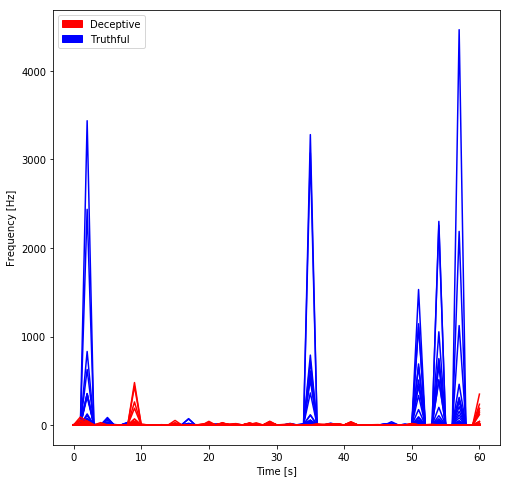

In [13]:
import matplotlib.patches as mpatches

red_patch = mpatches.Patch(color='red', label='Deceptive')
blue_patch = mpatches.Patch(color='blue', label='Truthful')

plt.show()

targets = ["Truthful","Deceptive"]
colors = ["blue", "red"]
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]');
ax.plot(mel_truth, color=colors[0])
ax.plot(mel_deceptive, color=colors[1])
plt.legend(handles=[red_patch, blue_patch])


In [18]:
durations = []
for label, sub_dir in enumerate(sub_dirs):
    for file_name in glob.glob(os.path.join(parent_dir,sub_dir,file_ext)):
        X, sample_rate = librosa.load(file_name)
        duration = librosa.get_duration(y=X, sr=sample_rate)
        print(duration)
        durations.append(duration)

13.733922902494331
35.587755102040816
23.010975056689343
21.0140589569161
17.99546485260771
7.500045351473923
19.812108843537416
12.736009070294784
4.504671201814059
27.815736961451247
71.57333333333334
30.59201814058957
28.39954648526077
19.017142857142858
72.14185941043084
40.868979591836734
34.75201814058957
32.02031746031746
30.00018140589569
26.006349206349206
20.01560090702948
21.0140589569161
27.00480725623583
22.01251700680272
38.01106575963719
34.0172335600907
30.00018140589569
24.009433106575965
31.02185941043084
34.0172335600907
29.00172335600907
22.383718820861677
29.00172335600907
33.01877551020408
23.010975056689343
31.02185941043084
12.687845804988662
37.01260770975057
29.00172335600907
30.00018140589569
26.006349206349206
81.4507029478458
6.919546485260771
44.36866213151927
22.57378684807256
30.00018140589569
10.89015873015873
22.01251700680272
22.56517006802721
28.514104308390024
37.01260770975057
37.01260770975057
32.02031746031746
25.007891156462584
17.02022675736961

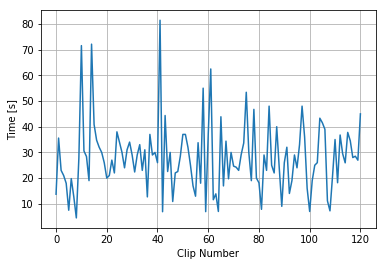

In [21]:
plt.xlabel('Clip Number')
plt.ylabel('Time [s]')
plt.grid(True)
plt.plot(durations)